# Section 0: Setup

Install necessary imports

In [7]:
import keras
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Section 1: Load and Process Dataset for Training and Testing

I am using the fashion MNIST dataset which consists of 10 clothing categories labeled in 'class_names' below. The dataset consists of 60,000 training + 10,000 test 28x28 images



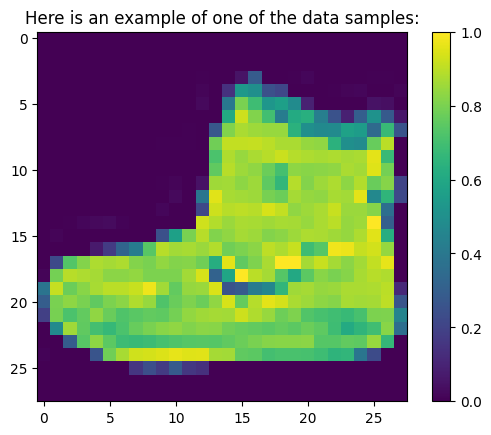

In [8]:
fashion_mnist = keras.datasets.fashion_mnist #gets dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #separates into training testing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #connects 0-9 class labels to its actual names

# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize the first image from the training dataset
plt.figure()
plt.title("Here is an example of one of the data samples:")
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)



# Section 2: Training and Testing Model

Set up model

In [9]:
# Model a simple 6-layer neural network
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Train model

In [10]:
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5160 - accuracy: 0.8127 - val_loss: 0.4212 - val_accuracy: 0.8488
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3840 - accuracy: 0.8591 - val_loss: 0.3655 - val_accuracy: 0.8668
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3460 - accuracy: 0.8720 - val_loss: 0.3749 - val_accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3235 - accuracy: 0.8796 - val_loss: 0.3326 - val_accuracy: 0.8817
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8876 - val_loss: 0.3820 - val_accuracy: 0.8677


Evaluate model on test data

In [11]:
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8625
Model - 6 layers - test loss: 40.51464796066284
Model - 6 layers - test accuracy: 86.2500011920929


# Section 3: Manifold - Principle Component Analysis of Model Outputs

This represents the manifold view that was discussed in class. We are taking our outputs and analyzing by creating a lower-dimensional representaion while keeping the most important data used for classification.

First, get the second to last layer outputs

In [12]:
my_input=test_images
for i in range(5):
    my_input = model_6.get_layer(index=i)(my_input)

Get the 3 dimensions with highest variance for classification

In [13]:
NCOMPONENTS = 3

pca = PCA(n_components=NCOMPONENTS)
pca.fit(my_input)
x=pca.transform(my_input)

print(x.shape)


(10000, 3)


Plot a 2D and 3D figure of the 2 and 3 dimensions to visualize classificaiton

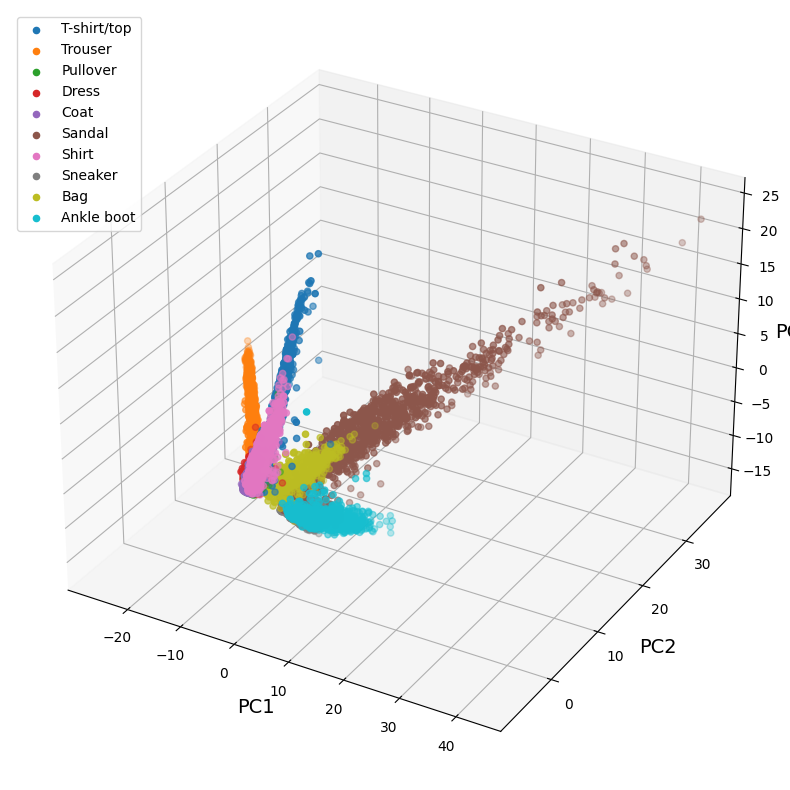

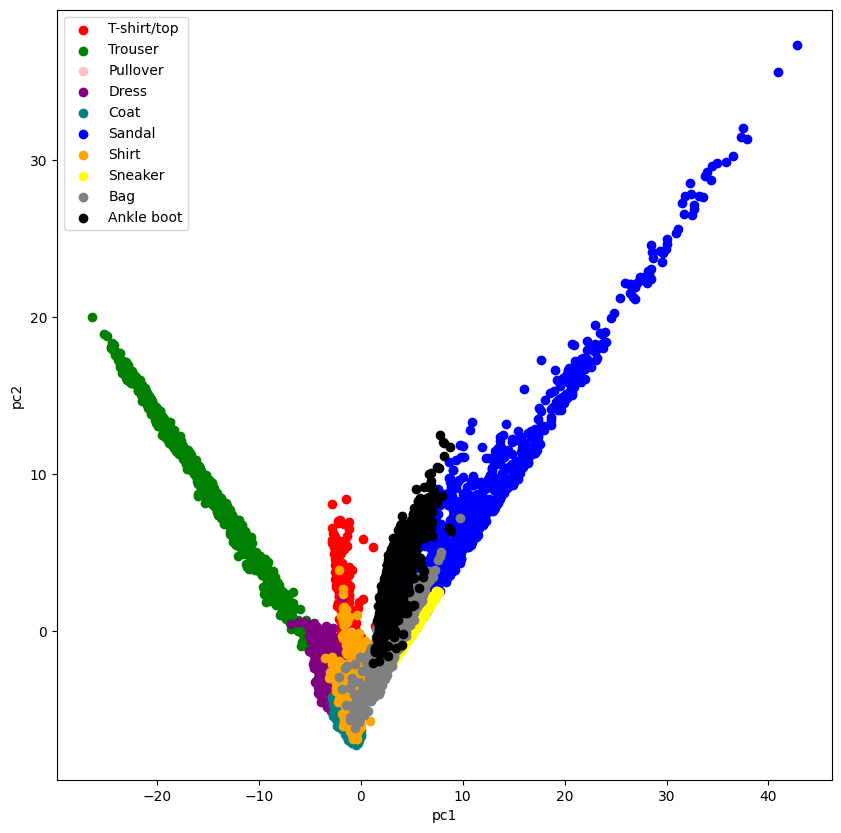

In [14]:
fig = plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.xlabel('pc1')
plt.ylabel('pc2')


axis = fig.add_subplot(111, projection='3d')



cdict={0:'red',1:'green',2:'pink', 3:'purple', 4:'teal', 5:'blue', 6:'orange', 7:'yellow', 8:'grey', 9:'black'}

for l in np.unique(test_labels):
 ix=np.where(test_labels==l)
 axis.scatter(x[ix][:,0], x[ix][:,1], x[ix][:,2], cdict,
           label=class_names[l])
 plt.scatter(x[ix][:,0],x[ix][:,1],c=cdict[l],label=class_names[l])

axis.set_xlabel("PC1", fontsize=14)
axis.set_ylabel("PC2", fontsize=14)
axis.set_zlabel("PC3", fontsize=14)

plt.legend()
axis.legend()
plt.show()